In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
from sklearn.datasets import make_blobs

In [3]:
#get data
data_X, data_Y = make_blobs(1000, 2, 3)
print data_X.shape, data_Y.shape

(1000, 2) (1000,)


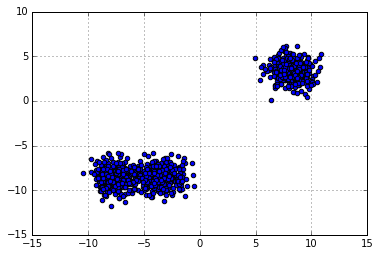

In [4]:
plt.figure(0)
plt.grid('on')
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [5]:
#set no of dimensions
k = 3

clusters = {}
colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']

for kx in range(k):
    #generate some random cluster centres
    center = 10*(np.random.random(data_X.shape[1])*2-1)
    points = []
    cluster_id = kx
    color = colors[kx]
    clusters[cluster_id] = {
        'points': points,
        'center' : center,
        'color': color
    }
print clusters

{0: {'color': 'red', 'points': [], 'center': array([ 7.70668207, -4.51199508])}, 1: {'color': 'green', 'points': [], 'center': array([ 5.16263283, -7.63380127])}, 2: {'color': 'blue', 'points': [], 'center': array([-3.05227303, -9.8316936 ])}}


In [6]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [7]:
def kmeans(train, k=3, i=5):
    for i in range(i):
        #allocation of each point to a cluster on the basis of distance
        for ix in range(train.shape[0]):
            dist = []
            for kx in range(k):
                d  = distance(clusters[kx]['center'], train[ix])
                dist.append(d)
            cl_id = np.argmin(dist)
            clusters[cl_id]['points'].append(train[ix])
        
        for kx in range(k):
            pts = np.asarray(clusters[kx]['points'])
            if pts.shape[0]>0:
                new_center = pts.mean(axis = 0)
            else :
                new_center = clusters[kx]['center']
                
            clusters[kx]['points'] = pts    
            clusters[kx]['center'] = new_center
        
        plt.figure(0)
        
        for kx in range(k):
            
            cc = clusters[kx]['center']
            pts = clusters[kx]['points']
            try: 
                plt.scatter(pts[:, 0], pts[:, 1], color = clusters[kx]['color'])
            except:
                pass
            
            plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')

            clusters[kx]['points'] = []
            
        plt.show()
            
                

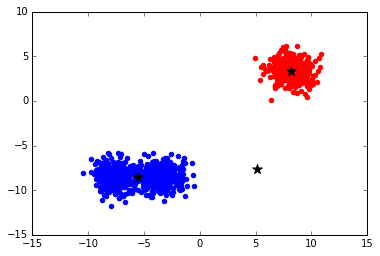

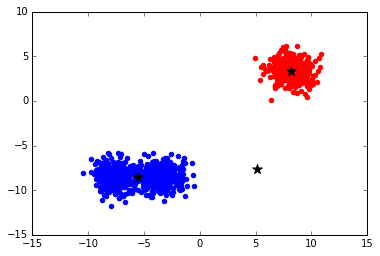

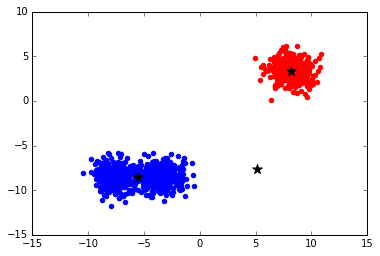

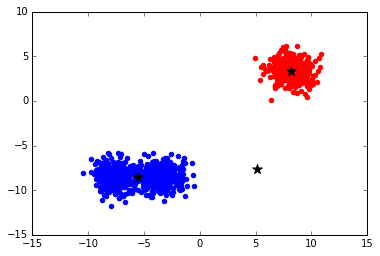

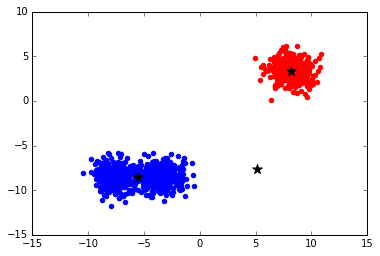

In [8]:
kmeans(data_X, k=3, i=5)

# Color extraction

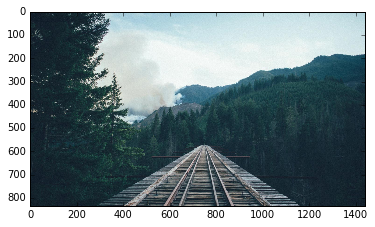

(835, 1440, 3)


In [9]:
img = cv2.imread("./background3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(0)
plt.imshow(img)
plt.show()
print img.shape

In [10]:
new_row = 100
new_col = int((float(img.shape[1])/img.shape[0])*new_row)
img = cv2.resize(img,(new_col,new_row))
img.shape

(100, 172, 3)

In [11]:
data = np.reshape(img, (-1, 3))
print data.shape

(17200, 3)


In [12]:
from sklearn.cluster import KMeans

In [43]:
km = KMeans(n_clusters=4)

In [44]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
centers = np.array(km.cluster_centers_, dtype = np.uint8)
print centers.shape
print centers

(4, 3)
[[212 228 230]
 [ 23  45  53]
 [130 140 144]
 [ 57  86  93]]


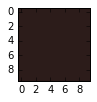

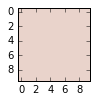

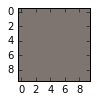

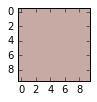

In [60]:
import matplotlib.gridspec as gridspec

a = np.zeros((10, 10, 3))

plt.figure(0)


for i in range(centers.shape[0]):
    a[:,:,:] = centers[i]
    plt.subplot(1, 4, i+1) 
    plt.imshow(a)
    plt.show()